In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
x = df["Marketing Spend"]
y = df["Profit"]

In [5]:
type(x)

pandas.core.series.Series

In [6]:
x = df["Marketing Spend"]
y = df["Profit"]
m = len(x)

In [7]:
def h(x,a0, a1):
    h = a0 +a1*x
    return h
def J(a0, a1, x, y, m):
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
        return j/(2*m)
    def gradJ(a0, a1, x, y, m):
        Dja0 = 0
        Dja1 = 0
        for i in range (m):
            Dja0 += (h(x[i],a0,a1) - y[i])
            Dja1 += (h(x[i],a0,a1) - y[i]) *x[i]
            gradJ =[Dja0/m, Dja1/m]
            return gradJ
        def ap1(a0,a1,gJ,alpha):
            a0p1 = a0 - alpha * gJ[0]
            a1p1 = a0 - alpha * gJ[1]
            ap1 = [a0p1, a1p1]
            return ap1

NameError: name 'ap1' is not defined

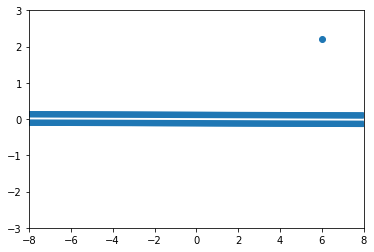

In [8]:
fig, ax = plt.subplots()
p0 = np.linspace(-8,8, 500)
p1 = np.linspace(-3,3, 500)
pa0, pa1 = np.meshgrid(p0, p1)      
ax.contour(pa0,pa1,J(pa0,pa1,x/1000,y/1000000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])
a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')
for i in range(300):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/1000,y/1000000,m), alpha=0.1 )
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-')
print(a0,a1)

In [ ]:
x_mean = x.mean()
x_std = x.std()

In [ ]:
y_mean = y.mean()
y_std = y.std()

In [ ]:
x_new = (x - x_mean) / x_std
y_new = (y - y_mean) / y_std

In [9]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) :
    fig, ax = plt.subplots()
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])
    a0 = -1; a1 = 4
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)
    for i in range(nsteps):
        a0old, a1old = a0, a1

    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
    print(a0,a1) 
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-') 
    plot_steps( startpt=[-1,4], alpha=.5, nsteps=10)
    print(a0,a1)
    
        

In [32]:
def plot_s(start, alpha, epoch):
    fig, ax = plt.subplots()
    p0 = np.linspace(-8,8, 500)
    ap1 = np.linspace(-3,3, 500)
    pa0, pa1 = np.meshgrid(p0, p1)
    ax.contour(pa0,pa1,J(pa0,pa1,x,y,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80, 0.9)])

    a0 = start[0]
    a1 = start[1]
    ax.plot(a0,a1, 'o')
    
    for i in range(epoch):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1 )
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-')
    print(a0,a1)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


TypeError: 'numpy.ndarray' object is not callable

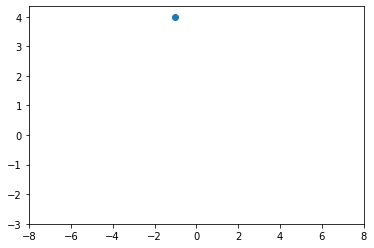

In [33]:
plot_s([-1, 4], 0.6, 9)

In [16]:
a0, a1

(6, 2.2)

In [27]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre